In [2]:
import numpy as np
import pandas as pd
import IPython.display as display
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings  # to avoid warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Marketing campaign.csv")
df.head()

,campaign_item_id,no_of_days,time,ext_service_id,ext_service_name,creative_id,creative_width,creative_height,search_tags,template_id,...,exchange_rate,media_cost_usd,position_in_content,unique_reach,total_reach,search_tag_cat,cmi_currency_code,timezone,weekday_cat,keywords
0,2733,7,2022-05-01,128,Facebook Ads,1000,300.0,250.0,#The Power of X,90.0,...,1,14.058514,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_end,delicate bracelets
1,2733,8,2022-05-02,16,DV360,1000,300.0,250.0,#Be Bold. Be X,90.0,...,1,99.633496,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,summer jewelry
2,2733,9,2022-05-03,128,Facebook Ads,1000,300.0,250.0,#Embrace Your Individuality with X,90.0,...,1,109.419677,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,artisan jewelry
3,2733,10,2022-05-04,128,Facebook Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,...,1,115.209499,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,layered bracelets
4,2733,11,2022-05-05,4,Google Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,...,1,66.990104,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,minimalist jewelry


In [4]:
df.columns.value_counts()


campaign_item_id       1
media_cost_usd         1
campaign_budget_usd    1
impressions            1
clicks                 1
stats_currency         1
currency_code          1
exchange_rate          1
position_in_content    1
max_bid_cpm            1
unique_reach           1
total_reach            1
search_tag_cat         1
cmi_currency_code      1
timezone               1
weekday_cat            1
network_margin         1
channel_name           1
no_of_days             1
search_tags            1
time                   1
ext_service_id         1
ext_service_name       1
creative_id            1
creative_width         1
creative_height        1
template_id            1
channel_id             1
landing_page           1
advertiser_id          1
advertiser_name        1
network_id             1
approved_budget        1
advertiser_currency    1
keywords               1
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72612 entries, 0 to 72611
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   campaign_item_id     72612 non-null  int64  
 1   no_of_days           72612 non-null  int64  
 2   time                 72612 non-null  object 
 3   ext_service_id       72612 non-null  int64  
 4   ext_service_name     72612 non-null  object 
 5   creative_id          72612 non-null  int64  
 6   creative_width       69200 non-null  float64
 7   creative_height      69200 non-null  float64
 8   search_tags          72612 non-null  object 
 9   template_id          69200 non-null  float64
 10  landing_page         72612 non-null  object 
 11  advertiser_id        72612 non-null  int64  
 12  advertiser_name      72612 non-null  object 
 13  network_id           72612 non-null  int64  
 14  approved_budget      72206 non-null  float64
 15  advertiser_currency  72612 non-null 

In [6]:
df.shape

(72612, 35)

In [7]:
# Calculate the total count of missing values for each variable

total_missing  = df.isnull().sum()
total_missing

campaign_item_id           0
no_of_days                 0
time                       0
ext_service_id             0
ext_service_name           0
creative_id                0
creative_width          3412
creative_height         3412
search_tags                0
template_id             3412
landing_page               0
advertiser_id              0
advertiser_name            0
network_id                 0
approved_budget          406
advertiser_currency        0
channel_id                 0
channel_name               0
max_bid_cpm            65206
network_margin             0
campaign_budget_usd        0
impressions                0
clicks                     0
stats_currency             0
currency_code              0
exchange_rate              0
media_cost_usd             0
position_in_content    72612
unique_reach           72612
total_reach            72612
search_tag_cat             0
cmi_currency_code          0
timezone                   0
weekday_cat                0
keywords      

In [8]:
percent_missing = (total_missing * 100) / df.isnull().count()

percent_missing = percent_missing.round(decimals=0)

# Create a DataFrame to store the missing data information

missing_data = pd.DataFrame({
    'Total' : total_missing,
    'Percentage of Missing Values': percent_missing,
    'Type': df.dtypes
})


# Sorting the DataFrame based on the total count of 
## missing values in descending order


missing_data = missing_data.sort_values(by = 'Total' , ascending = False)

missing_data

,Total,Percentage of Missing Values,Type
unique_reach,72612,100.0,float64
total_reach,72612,100.0,float64
position_in_content,72612,100.0,float64
max_bid_cpm,65206,90.0,float64
creative_width,3412,5.0,float64
creative_height,3412,5.0,float64
template_id,3412,5.0,float64
approved_budget,406,1.0,float64
exchange_rate,0,0.0,int64
clicks,0,0.0,int64


In [9]:
# filling missing values with 0 for following columns :

df['creative_width'].fillna(0,inplace=True)
df['creative_height'].fillna(0,inplace=True)
df['template_id'].fillna(0,inplace=True)
df['approved_budget'].fillna(0,inplace=True)

In [10]:
## First four columns in the table we obtained for missing values shows there are more than 80% of missing values for each column. 
## In such cases its better to drop column.

In [11]:
df.drop(columns = ['position_in_content',
                   'unique_reach','total_reach','max_bid_cpm'] , inplace=True)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
campaign_item_id,72612.0,3130.143282,142.154918,2733.000000,3148.000000,3173.000000,3202.000000,3.960000e+03
no_of_days,72612.0,27.036344,25.479175,0.000000,9.000000,19.000000,37.000000,1.180000e+02
ext_service_id,72612.0,49.449127,55.881324,4.000000,4.000000,16.000000,128.000000,1.280000e+02
creative_id,72612.0,7450.124842,4062.384982,1000.000000,3725.000000,7855.000000,10995.000000,1.560500e+04
creative_width,72612.0,255.226409,106.899767,0.000000,300.000000,300.000000,300.000000,3.000000e+02
creative_height,72612.0,212.688674,89.083139,0.000000,250.000000,250.000000,250.000000,2.500000e+02
template_id,72612.0,79.178648,26.894586,0.000000,90.000000,90.000000,90.000000,9.300000e+01
advertiser_id,72612.0,6195.862213,387.864576,4756.000000,6319.000000,6385.000000,6394.000000,6.490000e+03
network_id,72612.0,345.272861,23.707191,188.000000,353.000000,353.000000,353.000000,3.530000e+02
approved_budget,72612.0,125102.988672,561123.688744,0.000000,6000.000000,10000.000000,15000.000000,6.000000e+06


### CTR stands for click-through rate. It is a metric that measures the percentage of people who see an online advertisement and then click on it.
### The formula for calculating CTR is:
## CTR = (Clicks / Impressions) x 100

In [13]:
df['ctr'] = (df['clicks'] / df['impressions']) * 100

In [14]:
df.head(10)

,campaign_item_id,no_of_days,time,ext_service_id,ext_service_name,creative_id,creative_width,creative_height,search_tags,template_id,...,stats_currency,currency_code,exchange_rate,media_cost_usd,search_tag_cat,cmi_currency_code,timezone,weekday_cat,keywords,ctr
0,2733,7,2022-05-01,128,Facebook Ads,1000,300.0,250.0,#The Power of X,90.0,...,SGD,SGD,1,14.058514,Others,SGD,Asia/Singapore,week_end,delicate bracelets,0.955795
1,2733,8,2022-05-02,16,DV360,1000,300.0,250.0,#Be Bold. Be X,90.0,...,SGD,SGD,1,99.633496,Others,SGD,Asia/Singapore,week_day,summer jewelry,1.670463
2,2733,9,2022-05-03,128,Facebook Ads,1000,300.0,250.0,#Embrace Your Individuality with X,90.0,...,SGD,SGD,1,109.419677,Others,SGD,Asia/Singapore,week_day,artisan jewelry,1.498829
3,2733,10,2022-05-04,128,Facebook Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,...,SGD,SGD,1,115.209499,Others,SGD,Asia/Singapore,week_day,layered bracelets,2.062742
4,2733,11,2022-05-05,4,Google Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,...,SGD,SGD,1,66.990104,Others,SGD,Asia/Singapore,week_day,minimalist jewelry,1.300390
5,2766,53,2022-05-31,4,Google Ads,1005,0.0,0.0,#Be Bold. Be X,23.0,...,USD,USD,1,35.673124,Youtube,USD,America/New_York,week_day,beaded bracelets,1.353014
6,2766,54,2022-06-01,4,Google Ads,1005,0.0,0.0,#The Ultimate Fashion Statement with X,23.0,...,USD,USD,1,43.150656,Youtube,USD,America/New_York,week_day,bridal jewelry,2.054795
7,2766,55,2022-06-02,16,DV360,1005,0.0,0.0,#The Ultimate Fashion Statement with X,23.0,...,USD,USD,1,31.436393,Youtube,USD,America/New_York,week_day,unique and trendy jewelry,1.518987
8,2766,56,2022-06-03,16,DV360,1005,0.0,0.0,#The X Factor - Fashion for the Fearless,23.0,...,USD,USD,1,5.409166,Youtube,USD,America/New_York,week_day,clip-on earrings,0.878735
9,2766,57,2022-06-04,128,Facebook Ads,1005,0.0,0.0,#Be Bold. Be X,23.0,...,USD,USD,1,5.965384,Youtube,USD,America/New_York,week_day,bohemian jewelry,1.386482


In [15]:
# Convert 'time' column to datetime

df['time'] = pd.to_datetime(df['time'])

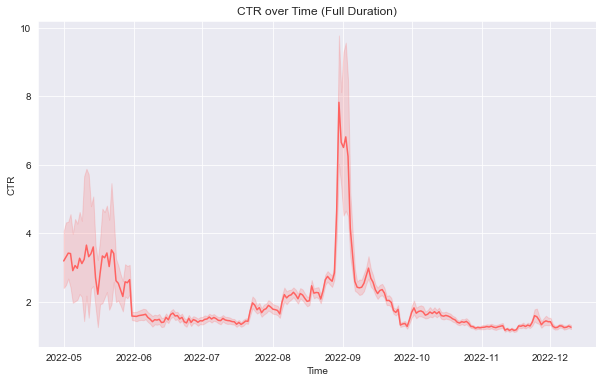

In [16]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.lineplot(x='time' ,y='ctr', data = df , color= '#FF6361')
plt.title('CTR over Time (Full Duration)')
plt.xlabel('Time')
plt.ylabel('CTR')

plt.show()

In [17]:
# CTR over last 7 days

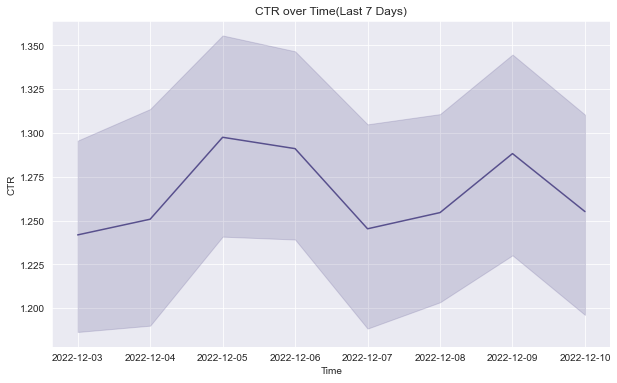

In [18]:
last_days = pd.to_datetime(df['time'].max()) - pd.DateOffset(days=7)

df_last_days = df[df['time'] >= last_days]


plt.figure(figsize=(10,6))

sns.lineplot(x='time' ,y = 'ctr' ,data = df_last_days , color='#58508D')
plt.title("CTR over Time(Last 7 Days)")
plt.xlabel("Time")
plt.ylabel("CTR")

plt.show()

In [19]:
# Comparing the spent budget with the number of days

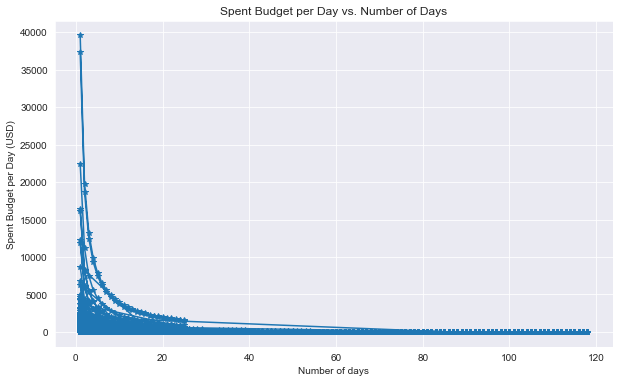

In [20]:
df['spent_budget_per_day'] = df['campaign_budget_usd'] / df['no_of_days']

plt.figure(figsize=(10,6))
plt.plot(df['no_of_days'],df['spent_budget_per_day'], marker = '*')
plt.xlabel('Number of days')
plt.ylabel('Spent Budget per Day (USD)')

plt.title("Spent Budget per Day vs. Number of Days")
plt.grid(True)
plt.show()

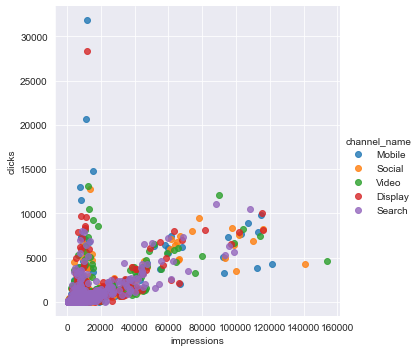

In [21]:
#checking impressions and click with channel distributions 

sns.lmplot(x='impressions' , y ='clicks' , data =df , fit_reg =False, hue='channel_name')


### - Mobile campaigns receive more clicks compared to other campaigns. If a campaign is performing poorly for a prolonged period and needs to be paused, reallocating its budget to mobile campaigns can be beneficial.
### - Search campaigns have lower impressions and clicks, indicating a need for improvement. Enhancing the performance of search campaigns can be achieved by using effective keywords, search tags, and compelling call-to-action strategies.
### - Social campaigns & video have a wider reach but struggle to generate conversions. To improve the effectiveness of social campaigns, emphasis should be placed on enhancing the creative elements and making them more engaging to the target audience.

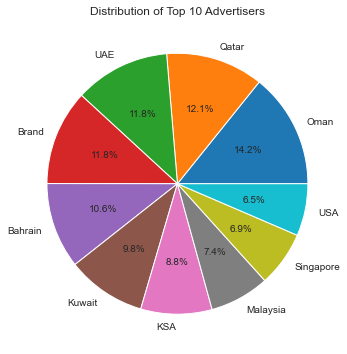

In [22]:
# top 10

counts = df['advertiser_name'].value_counts().head(10)

plt.figure(figsize=(8,6))
plt.pie(counts.values , labels= counts.index, autopct = '%1.1f%%')
plt.title('Distribution of Top 10 Advertisers')  
plt.show()

In [23]:
# Model

In [24]:
df.head(5)

,campaign_item_id,no_of_days,time,ext_service_id,ext_service_name,creative_id,creative_width,creative_height,search_tags,template_id,...,currency_code,exchange_rate,media_cost_usd,search_tag_cat,cmi_currency_code,timezone,weekday_cat,keywords,ctr,spent_budget_per_day
0,2733,7,2022-05-01,128,Facebook Ads,1000,300.0,250.0,#The Power of X,90.0,...,SGD,1,14.058514,Others,SGD,Asia/Singapore,week_end,delicate bracelets,0.955795,93.167702
1,2733,8,2022-05-02,16,DV360,1000,300.0,250.0,#Be Bold. Be X,90.0,...,SGD,1,99.633496,Others,SGD,Asia/Singapore,week_day,summer jewelry,1.670463,81.521739
2,2733,9,2022-05-03,128,Facebook Ads,1000,300.0,250.0,#Embrace Your Individuality with X,90.0,...,SGD,1,109.419677,Others,SGD,Asia/Singapore,week_day,artisan jewelry,1.498829,72.463768
3,2733,10,2022-05-04,128,Facebook Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,...,SGD,1,115.209499,Others,SGD,Asia/Singapore,week_day,layered bracelets,2.062742,65.217391
4,2733,11,2022-05-05,4,Google Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,...,SGD,1,66.990104,Others,SGD,Asia/Singapore,week_day,minimalist jewelry,1.300390,59.288538


## Linear Regression

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics  import r2_score,mean_squared_error, mean_absolute_error


In [26]:
# Split the data into features (X) and target variable (y)

X = df[['clicks' , 'impressions']]
y = df['ctr']

X_train , X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

lrmodel = LinearRegression()

In [27]:
lrmodel.fit(X_train,y_train)

y_pred= lrmodel.predict(X_test)

In [28]:
mse = mean_squared_error(y_test, y_pred)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

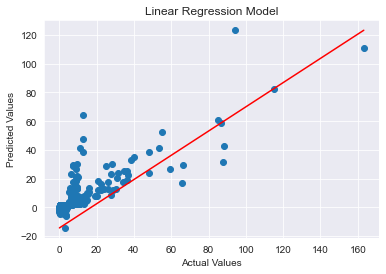

MSE: 3.150506192017186
MAE: 0.8026892490527091
RMSE: 1.7749665326470767


In [29]:
# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Model')
plt.show()

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)

## Decision Tree Regressor

In [30]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state = 42)

dt_model.fit(X_train,y_train)

y_pred_dt = dt_model.predict(X_test)

In [31]:
print("Decision Tree Regression Model Evaluation:")
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
print(f"R-squared score: {r2_dt}")
print(f"Mean Squared Error: {mse_dt}")
print(f"Mean Absolute Error: {mae_dt}")

Decision Tree Regression Model Evaluation:
R-squared score: 0.9658424286223787
Mean Squared Error: 0.3268214246572036
Mean Absolute Error: 0.03138088629234726


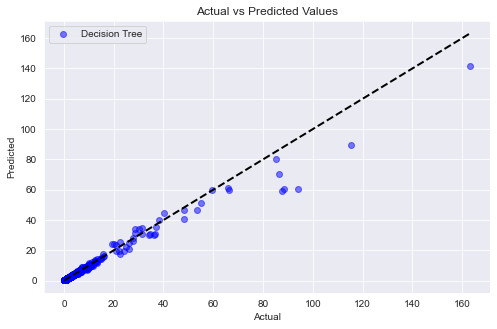

In [32]:


plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_dt, color='blue', alpha=0.5, label='Decision Tree')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


## Random Forest Regressor

In [33]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state= 42)
rf_model.fit(X_train,y_train)
y_pred_rf= rf_model.predict(X_test)

In [34]:
# Evaluate Random Forest Model
print("\nRandom Forest Regression Model Evaluation:")
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"R-squared score: {r2_rf}")
print(f"Mean Squared Error: {mse_rf}")
print(f"Mean Absolute Error: {mae_rf}")


Random Forest Regression Model Evaluation:
R-squared score: 0.9789950375385992
Mean Squared Error: 0.20097657648469935
Mean Absolute Error: 0.01899096211025253


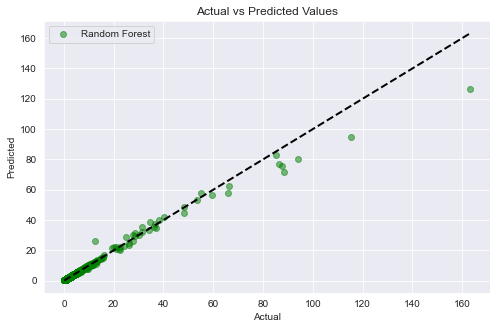

In [35]:

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5, label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()
